# Choosing Priors: ABC SMC on Lokta Volterra Model
**Note:**  
This is a purely ABC based file, so does not need the JAX compiled version of PINTS.
> All examples in this notebook are with time space (0,20,30)  
> Contains applications with/without noise using differnet uniform/MVN priors.
## The LV Model-Uniform Priors

In [1]:
import pints
import pints.toy as toy
import pints.toy.stochastic
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

### Example Trajectories

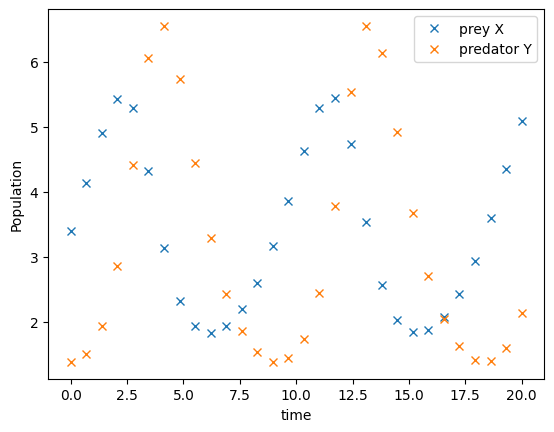

In [3]:
np.random.seed(1)

# Load the LV model
model = toy.LotkaVolterraModel()

# Example of a toy data with suggested parameter values
times = np.linspace(0, 20,30)
params = np.array([0.5,0.15,1,.3])
values = model.simulate(params, times)

plt.plot(times, values[:,0], 'x', label = 'prey X')
plt.plot(times, values[:,1], 'x', label = 'predator Y')

plt.legend()
plt.xlabel('time')
plt.ylabel('Population'),
plt.show()

### Fit ABC SMC with Uniform Priors
Here we use the sum of squares error(SSE) for the distance function to reject/accept.  
Set the thresholds. We accept a parameter value if the $SSE<10$ for the first intermediate distribution, $SSE<7.5$ for the second one and $SSE<5$ for the last.
#### First Attempt
$$[0,1] * [0.1,0.2] * [0,2] * [0.25,0.35]$$

In [4]:
np.random.seed(8)
problem = pints.MultiOutputProblem(model, times, values)
error_measure = pints.SumOfSquaresError(problem)

log_prior = pints.UniformLogPrior([0,0.1,0,0.25], [1,0.2,2,0.35])
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)

# set threshold schedule
abc.sampler().set_threshold_schedule(np.array([10,7.5,5]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(200)

# set target number of samples
abc.set_n_samples(1600)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()

/var/folders/3z/d020c1ln2rbdn3rrr_x9nwxh0000gn/T/ipykernel_36610/3301515780.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior([0,0.1,0,0.25], [1,0.2,2,0.35])


Running...
Using ABC-SMC
Running in sequential mode.
Starting t=0, with threshold=10.0
Iter. Eval. Acceptance rate Time m:s
1     153    0.00653594771    0:00.3
2     614    0.00325732899    0:01.1
3     1211   0.00247729149    0:02.2
20    12191  0.00164055451    0:19.3
40    20454  0.00195560771    0:31.9
60    31392  0.00191131498    0:47.5
80    44773  0.00178679115    1:08.5
100   56996  0.00175450909    1:27.8
120   71107  0.00168759756    1:48.5
140   82934  0.00168808932    2:06.7
160   94082  0.00170064412    2:23.9
180   105995  0.00169819331    2:41.7
Starting t=1, with threshold=7.5
200   114424  0.00174788506    2:55.2
220   114698  0.00191808052    2:55.7
240   114978  0.00208735584    2:56.2
260   115220  0.00225655268    2:56.7
280   115428  0.00242575458    2:57.1
300   115572  0.00259578445    2:57.4
320   115791  0.00276359993    2:57.7
340   116018  0.00293057974    2:58.2
360   116277  0.00309605511    2:58.8
380   116541  0.00326065505    2:59.3
Starting t=2, with

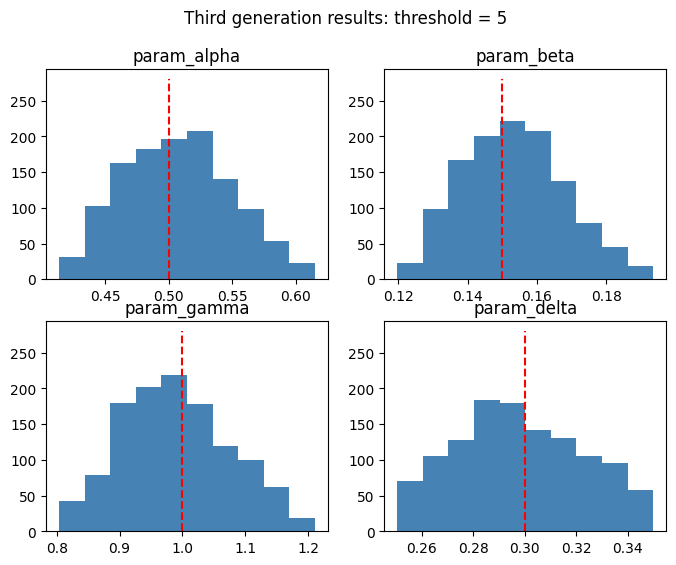

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0,0].hist([x[0] for x in samples[400:]], color='steelblue')
axs[0,0].set_title('param_alpha')
axs[0,0].vlines(x=model.suggested_parameters()[0], linestyles='dashed', ymin=0, ymax=280, label='Actual value', color='red')

axs[0,1].hist([x[1] for x in samples[400:]], color='steelblue')
axs[0,1].set_title('param_beta')
axs[0,1].vlines(x=model.suggested_parameters()[1], linestyles='dashed', ymin=0, ymax=280, label='Actual value', color='red')

axs[1,0].hist([x[2] for x in samples[400:]], color='steelblue')
axs[1,0].set_title('param_gamma')
axs[1,0].vlines(x=model.suggested_parameters()[2], linestyles='dashed', ymin=0, ymax=280, label='Actual value', color='red')

axs[1,1].hist([x[3] for x in samples[400:]], color='steelblue')
axs[1,1].set_title('param_delta')
axs[1,1].vlines(x=model.suggested_parameters()[3], linestyles='dashed', ymin=0, ymax=280, label='Actual value', color='red')

plt.suptitle('Third generation results: threshold = 5')
plt.show()

#### Second Attempt
$$[0,1] * [0,0.5] * [0,2] * [0,0.5]$$

In [6]:
np.random.seed(8)
problem = pints.MultiOutputProblem(model, times, values)
error_measure = pints.SumOfSquaresError(problem)

log_prior = pints.UniformLogPrior([0,0,0,0], [1,0.5,2,0.5])
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)

# set threshold schedule
abc.sampler().set_threshold_schedule(np.array([10,7.5,5]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(200)

# set target number of samples
abc.set_n_samples(1600)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples_2  = abc.run()

/var/folders/3z/d020c1ln2rbdn3rrr_x9nwxh0000gn/T/ipykernel_36610/2364986800.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior([0,0,0,0], [1,0.5,2,0.5])


Running...
Using ABC-SMC
Running in sequential mode.
Starting t=0, with threshold=10.0
Iter. Eval. Acceptance rate Time m:s
1     3051   0.00032776139    0:04.5
2     11848  0.000168804862   0:16.8
3     13409  0.00022373033    0:19.1
20    116187  0.000172136298   2:44.8


/Users/lthao/miniconda3/envs/prior_cvae/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


40    256827  0.000155746865   6:08.2
60    449874  0.000133370677  10:41.3
80    627162  0.000127558749  14:52.2
100   788599  0.000126807161  18:47.4
120   922078  0.000130140834  21:56.2
140   1124812  0.000124465244  27:09.2
160   1292370  0.000123803555  31:33.9
180   1431253  0.000125763929  35:06.1
Starting t=1, with threshold=7.5
200   1626306  0.000122978087  39:41.8
220   1626682  0.000135244627  39:42.4
240   1627016  0.000147509305  39:42.9
260   1627429  0.000159761194  39:43.6
280   1627966  0.000171993764  39:44.4
300   1628434  0.000184226072  39:45.2
320   1628868  0.000196455452  39:45.8
340   1629565  0.000208644638  39:47.0
360   1630134  0.000220840741  39:47.8
380   1630440  0.000233065921  39:48.3
Starting t=2, with threshold=5.0
400   1630757  0.000245284859  39:49.5
420   1631249  0.000257471422  39:50.3
440   1631982  0.000269610817  39:51.4
460   1632766  0.000281730511  39:52.6
480   1633387  0.000293867895  39:53.6
500   1634140  0.000305971337  39:54.8
520

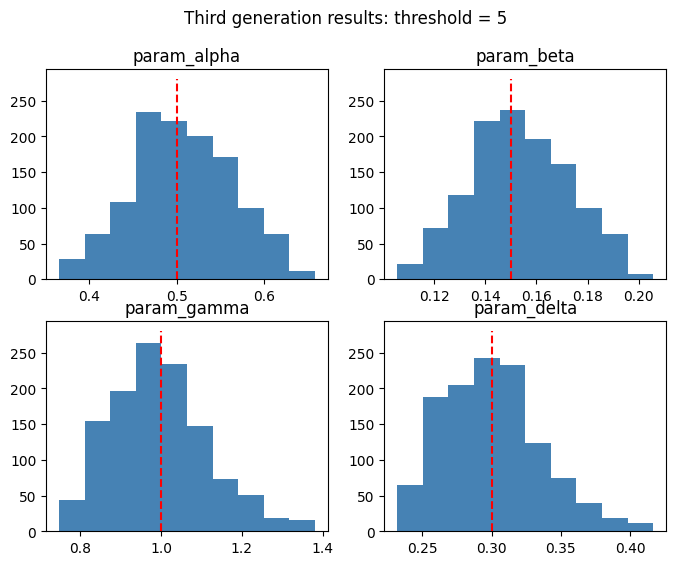

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0,0].hist([x[0] for x in samples_2[400:]], color='steelblue')
axs[0,0].set_title('param_alpha')
axs[0,0].vlines(x=model.suggested_parameters()[0], linestyles='dashed', ymin=0, ymax=280, label='Actual value', color='red')

axs[0,1].hist([x[1] for x in samples_2[400:]], color='steelblue')
axs[0,1].set_title('param_beta')
axs[0,1].vlines(x=model.suggested_parameters()[1], linestyles='dashed', ymin=0, ymax=280, label='Actual value', color='red')

axs[1,0].hist([x[2] for x in samples_2[400:]], color='steelblue')
axs[1,0].set_title('param_gamma')
axs[1,0].vlines(x=model.suggested_parameters()[2], linestyles='dashed', ymin=0, ymax=280, label='Actual value', color='red')

axs[1,1].hist([x[3] for x in samples_2[400:]], color='steelblue')
axs[1,1].set_title('param_delta')
axs[1,1].vlines(x=model.suggested_parameters()[3], linestyles='dashed', ymin=0, ymax=280, label='Actual value', color='red')

plt.suptitle('Third generation results: threshold = 5')
plt.show()

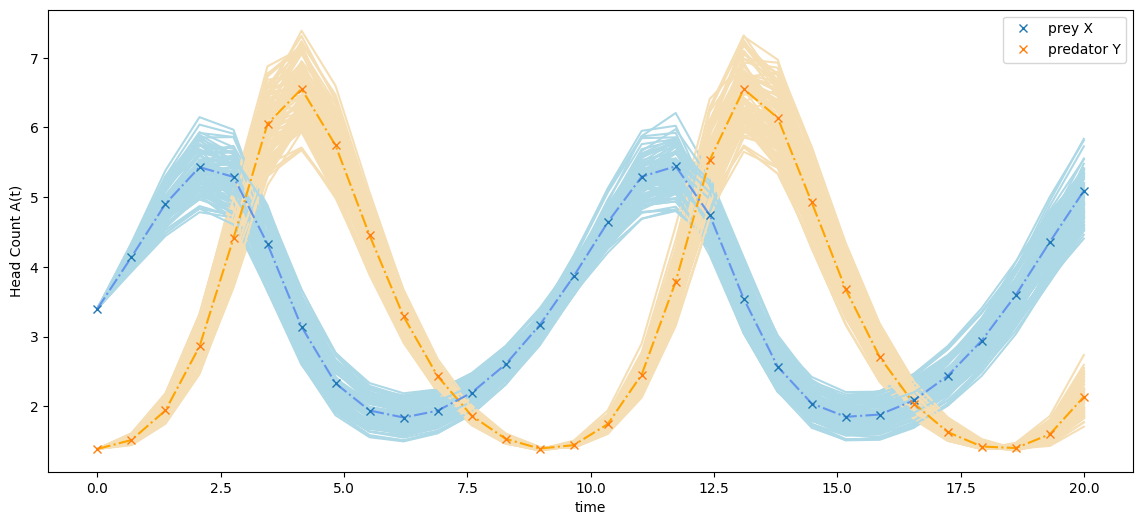

In [18]:
plt.figure(figsize=(14,6))


for i in np.random.randint(400, 1600, 100):
    params = samples_2[i]
    sim = model.simulate(params, times)
    plt.plot(times, sim[:, 1], color = 'wheat')
    plt.plot(times, sim[:, 0], color='lightblue')
plt.plot(times, values[:,1], '-.', color = 'orange')
plt.plot(times, values[:,0], '-.',color='cornflowerblue')
plt.plot(times, values[:, 0],'x', label="prey X")
plt.plot(times, values[:, 1], 'x',label="predator Y")
plt.xlabel("time")
plt.ylabel("Head Count A(t)")
plt.legend()

### Noisy Data

In [14]:
def add_noise(values,dim,var = 0.1):
    noise = np.random.normal(loc=0,scale=var,size=(dim,2))
    return values + noise

In [15]:
np.random.seed(1)

# Load the LV model
model = toy.LotkaVolterraModel()

# Example of a toy data with suggested parameter values
times = np.linspace(0, 20, 30)
params = np.array([0.5,0.15,1,0.3])
values = model.simulate(params, times)

In [16]:
noisy_values = add_noise(values, dim=30,var=0.2)

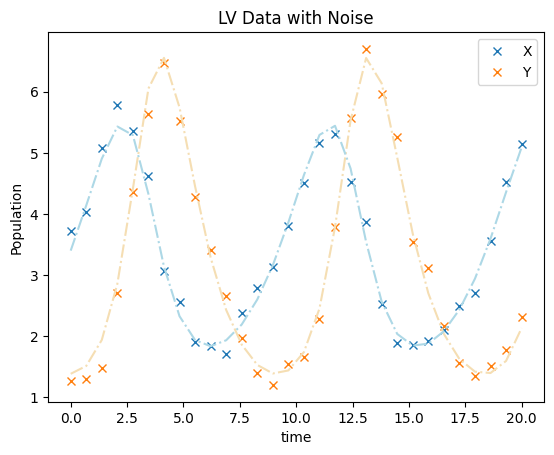

In [17]:
plt.plot(times, noisy_values[:,0], 'x', label = 'X')
plt.plot(times, noisy_values[:,1], 'x', label = 'Y')
plt.plot(times, values[:,1], '-.', color = 'wheat')
plt.plot(times, values[:,0], '-.',color='lightblue')
plt.title('LV Data with Noise')

plt.legend()
plt.xlabel('time')
plt.ylabel('Population'),
plt.show()

In [ ]:
np.random.seed(8)
problem = pints.MultiOutputProblem(model, times, noisy_values)
error_measure = pints.SumOfSquaresError(problem)

log_prior = pints.UniformLogPrior([0,0.1,0,0.25], [1,0.2,2,0.35])
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)

# set threshold schedule
abc.sampler().set_threshold_schedule(np.array([10,7.5,5]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(200)

# set target number of samples
abc.set_n_samples(1600)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples_noise  = abc.run()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0,0].hist([x[0] for x in samples_noise[400:]], color='steelblue')
axs[0,0].set_title('param_alpha')
axs[0,0].vlines(x=model.suggested_parameters()[0], linestyles='dashed', ymin=0, ymax=250, label='Actual value', color='red')

axs[0,1].hist([x[1] for x in samples_noise[400:]], color='steelblue')
axs[0,1].set_title('param_beta')
axs[0,1].vlines(x=model.suggested_parameters()[1], linestyles='dashed', ymin=0, ymax=250, label='Actual value', color='red')

axs[1,0].hist([x[2] for x in samples_noise[400:]], color='steelblue')
axs[1,0].set_title('param_gamma')
axs[1,0].vlines(x=model.suggested_parameters()[2], linestyles='dashed', ymin=0, ymax=250, label='Actual value', color='red')

axs[1,1].hist([x[3] for x in samples_noise[400:]], color='steelblue')
axs[1,1].set_title('param_delta')
axs[1,1].vlines(x=model.suggested_parameters()[3], linestyles='dashed', ymin=0, ymax=250, label='Actual value', color='red')

plt.suptitle('Third generation results: threshold = 5')
plt.show()

In [ ]:
np.random.seed(8)
problem = pints.MultiOutputProblem(model, times, noisy_values)
error_measure = pints.SumOfSquaresError(problem)

log_prior = pints.UniformLogPrior([0,0,0,0], [1,0.5,2,0.5])
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)

# set threshold schedule
abc.sampler().set_threshold_schedule(np.array([10,7.5,5]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(200)

# set target number of samples
abc.set_n_samples(1600)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples_noise_2  = abc.run()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0,0].hist([x[0] for x in samples_noise_2[400:]], color='steelblue')
axs[0,0].set_title('param_alpha')
axs[0,0].vlines(x=model.suggested_parameters()[0], linestyles='dashed', ymin=0, ymax=250, label='Actual value', color='red')

axs[0,1].hist([x[1] for x in samples_noise_2[400:]], color='steelblue')
axs[0,1].set_title('param_beta')
axs[0,1].vlines(x=model.suggested_parameters()[1], linestyles='dashed', ymin=0, ymax=250, label='Actual value', color='red')

axs[1,0].hist([x[2] for x in samples_noise_2[400:]], color='steelblue')
axs[1,0].set_title('param_gamma')
axs[1,0].vlines(x=model.suggested_parameters()[2], linestyles='dashed', ymin=0, ymax=250, label='Actual value', color='red')

axs[1,1].hist([x[3] for x in samples_noise_2[400:]], color='steelblue')
axs[1,1].set_title('param_delta')
axs[1,1].vlines(x=model.suggested_parameters()[3], linestyles='dashed', ymin=0, ymax=250, label='Actual value', color='red')

plt.suptitle('Third generation results: threshold = 5')
plt.show()

In [ ]:
# plot results
plt.figure(figsize=(14,6))


for i in np.random.randint(400, 1600, 100):
    params = samples_noise_2[i]
    sim = model.simulate(params, times)
    plt.plot(times, sim[:, 1], color = 'wheat')
    plt.plot(times, sim[:, 0], color='lightblue')
plt.plot(times, values[:,1], '-.', color = 'orange')
plt.plot(times, values[:,0], '-.',color='cornflowerblue')
plt.plot(times, noisy_values[:, 0],'x', label="prey X")
plt.plot(times, noisy_values[:, 1], 'x',label="predator Y")
plt.xlabel("time")
plt.ylabel("Population")
plt.legend()